### Imports

<style TYPE="text/css">
code.has-jax {font: inherit; font-size: 100%; background: inherit; border: inherit;}
</style>
<script type="text/x-mathjax-config">
MathJax.Hub.Config({
    tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        skipTags: ['script', 'noscript', 'style', 'textarea', 'pre'] // removed 'code' entry
    }
});
MathJax.Hub.Queue(function() {
    var all = MathJax.Hub.getAllJax(), i;
    for(i = 0; i < all.length; i += 1) {
        all[i].SourceElement().parentNode.className += ' has-jax';
    }
});
</script>
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

### Removes warnings that occassionally show up
import warnings
warnings.filterwarnings('ignore')

### 6.10.

Construct a Metropolis Monte Carlo code for a two-dimensional Ising magnet with 20 * 20 = 400 spins and periodic boundary conditions.  Run the code and collect statistics from the trajectory to analyze the spin statistics.  In particuluar, compute

$$ \langle s_1 \rangle = {\lim_{T \to \infty} \bigg \langle \frac{1}{N}\sum_{i=1}^{N}s_i \bigg \rangle}_T $$

and for various separations between spins $i$ and $j$, compute the correlation function

$$ \langle s_i s_j \rangle - \langle s_i \rangle \langle s_j \rangle = \lim_{T \to \infty} \Bigg[ { \bigg \langle \frac{1}{N} \sum_{lm}^{(i,j)} s_l s_m \bigg \rangle }_T - { \langle s_i \rangle }_T^2 \Bigg], $$

where $ \sum_{lm}^{(i,j)} $ is over all pairs of spins in the lattice for which $l$ and $m$ are separated by the same distance as $i$ and $j$, and $N_{ij}$ us the total number of such pairs in the lattice.  Perform these calculations for temperatures both above and below the critical point.  Try to demonstrate the existance of long range correlations near the critical point and spontaneous symmetry breaking below the critical temperature.

### 6.11.

Consider the two-dimensional Ising model with an additional external field in the energy,

$$ \sum_{i=1}^N h_i s_i $$

where $h_i = +h $ for spins lying on the left half of the top row of the square lattice, $ h_i = -h $ for spins in the right half of the top row, and $ h_i = 0 $ for all other sites.  For large enough $ h $, and for $ T < T_c $, this field will bias interfaces to exist near the middle and side columns of the square lattice.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (a) Modify the Monte Carlo code given in the Appendix to include this external field and use it to observe fluctuations of the interfaces

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (b) With the modified code at a temperature well below $ T_c $ (e.g., $ T \approx \frac{1}{2} T_c $), determine the spin-spin correlation function for pairs of spins situated in the column midway between left and right columns of the square lattice (i.e., the tenth column in the 20 * 20 lattice).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (c) Perform the same Monte Carlo calulation as in part (b), but now for the fifth column from the left.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (d) Plot the $ \langle s_i s_j \rangle - \langle s_i \rangle \langle s_j \rangle $ determined in parts (b) and (c) as a function of the distance between the spins.  Comment on your observations.  How would your results change if the system size was changed to a 40 * 4o lattice, and the columns being sampled were changed to the tenth and twentieth, respectively?

### 6.12

Your computer contains a pseudo-random-number generator that creates (nearly) random sequences of numbers, x, and distributed uniformly between 0 and 1.  Develop an algorithm that uses this random number generator to create a Gaussian distribution of random numbers.  A Gaussian distribution is

$$ p(x) = \sqrt{\frac{\alpha}{\pi}} e^{-\alpha x^2}, $$

and its first several moments are

$$ \langle x \rangle = \langle x^3 \rangle = 0, $$

$$ \langle x^2 \rangle = \frac{1}{2 \alpha}, $$

$$ \langle x^4 \rangle = 3 { \langle x^2 \rangle } ^2 . $$

Study the numerical accuracy and convergence with which your algorithm reproduces these moments.  (Note: There is more than one way to work out this exercise.  One method uses an acceptance-rejection procedure like Metropolis Monte Carlo algorithm.  Another perhaps more efficient procedure employs a change in variables.)

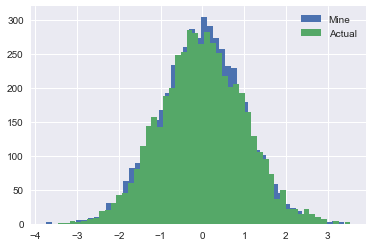

In [2]:
N = 5000
alpha = 0.5

def gauss_sample(size, alpha):
    """
    Method 1: acceptance-rejection procedure.  (This is not very efficient!)
    """
    ret = list()
    while len(ret) < size:
        sample_1 = 1000 * (np.random.random() - 0.5)
        prob = np.sqrt(alpha / math.pi) * np.exp(- alpha * (sample_1 ** 2))
        sample_2 = np.random.random()
        if sample_2 < prob:
            ret.append(sample_1)
    return ret

mine   = gauss_sample(N, alpha)
actual = np.random.normal(size=N)


### Plotting
num_bins = 50
plt.hist(mine, bins=num_bins, label="Mine")
plt.hist(actual, bins=num_bins, label="Actual")
plt.legend();

In [7]:
def get_moment(dist, moment_num):
    """
    Calculates a specific moment for a distribution
    """
    moment = sum([math.pow(x, moment_num) for x in dist]) / len(dist)
    return moment

def characteristics(dist):
    """
    Returns the first four moments of a distribution
    """
    moments = list()
    moments.append(get_moment(dist, 1))
    moments.append(get_moment(dist, 2))
    moments.append(get_moment(dist, 3))
    moments.append(get_moment(dist, 4))
    return moments

cols = ["⟨x⟩", "⟨x**2⟩", "⟨x**3⟩", "⟨x**4⟩"]

mine_char   = pd.DataFrame([characteristics(mine)], columns=cols)
actual_char = pd.DataFrame([characteristics(actual)], columns=cols)

full = pd.concat([mine_char, actual_char])
full.index = ["Mine", "Actual"]

"""
We're expecting the moments of both distributions to be very similar!

Also, as stated in the problem...

• ⟨x⟩    ~ 0

• ⟨x**2⟩ ~ (1 / 2α)
        ~ 1
        
• ⟨x**3⟩ ~ 0

• ⟨x**4⟩ ~ 3 * ( ⟨x**2⟩ ) ** 2
        ~ 3
"""
full

,⟨x⟩,⟨x**2⟩,⟨x**3⟩,⟨x**4⟩
Mine,-0.019354,0.979806,-0.089747,2.927241
Actual,-0.002895,1.017554,0.042820,3.092933
